# Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sympy import Matrix
from IPython.display import display, Math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()

## Load and Process Data

In [2]:
data = pd.read_csv('nasa.csv')

### Remove Repeat Columns and ID Columns

In [3]:
data.drop(['Neo Reference ID','Name','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)',
           'Est Dia in Feet(min)','Est Dia in Feet(max)','Close Approach Date','Epoch Date Close Approach',
           'Relative Velocity km per hr','Miles per hour','Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(miles)',
           'Orbiting Body','Orbit ID','Orbit Determination Date','Equinox'],axis=1,inplace=True)

### Setup Binary Classifier

In [4]:
data.Hazardous = [1 if val==True else -1 for val in data.Hazardous]

### Rescale Features

In [5]:
y_check = data.Hazardous.values.reshape(-1,1)
X_check = data.drop(['Hazardous'],axis=1).values
X_check = scaled.fit_transform(X_check)

### Check for Correlated Features

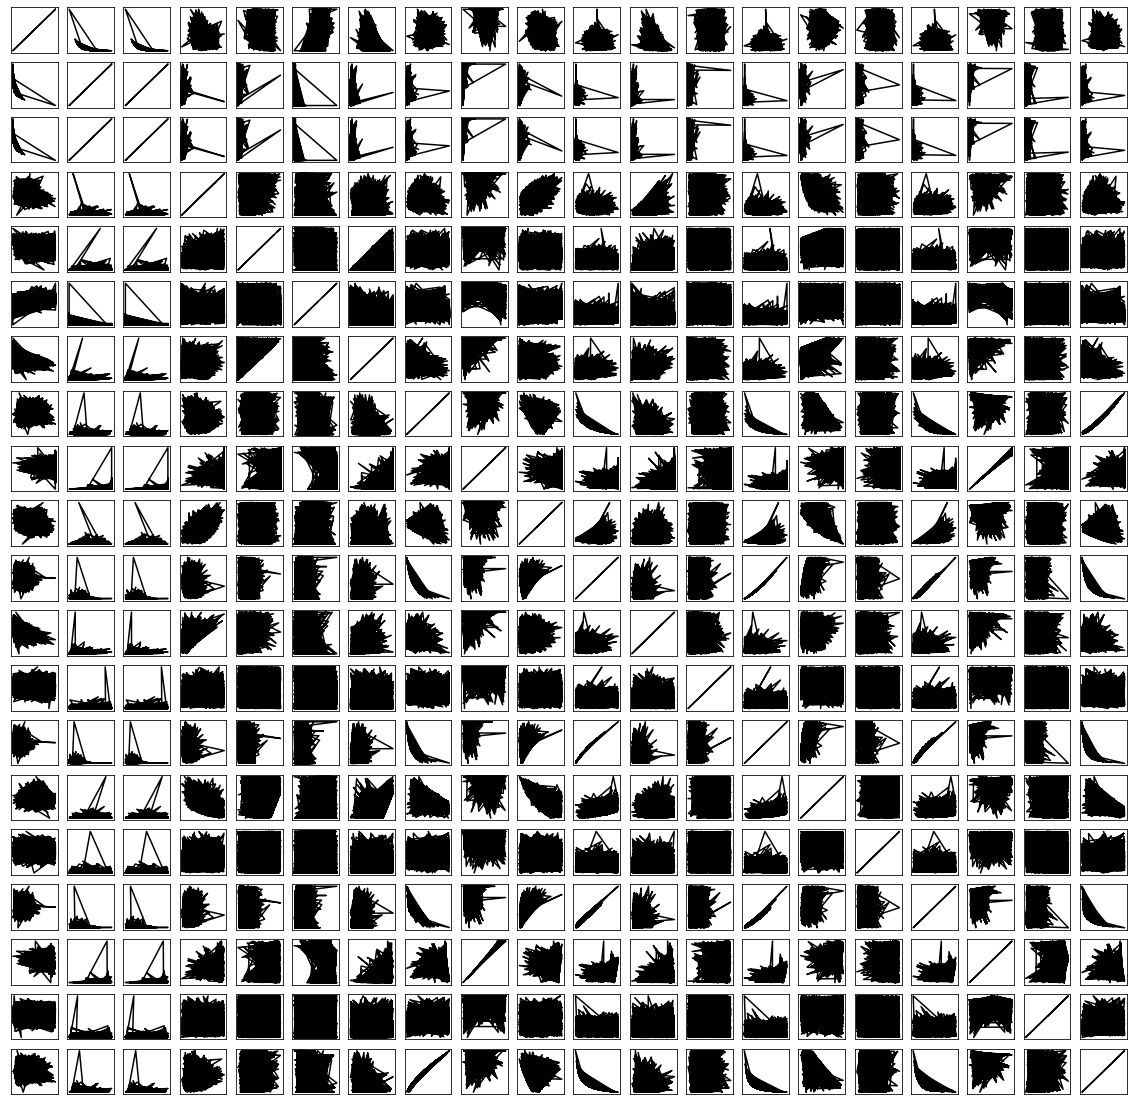

In [6]:
fig = plt.figure(figsize=(20,20))

k = 1

for i in range(X_check.shape[1]):
    for j in range(X_check.shape[1]):
        fig.add_subplot(X_check.shape[1],X_check.shape[1], k)
        plt.plot(X_check[:,i],X_check[:,j],color='k')
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        k = k + 1

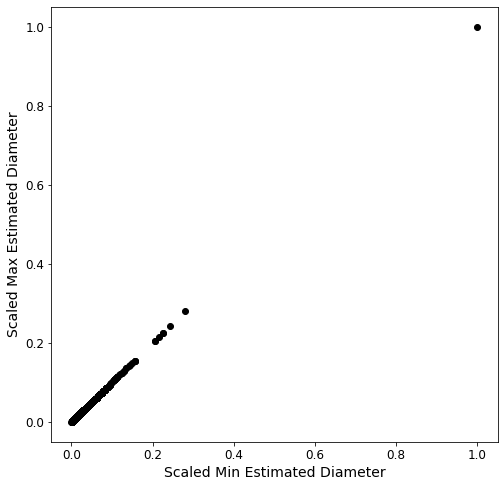

In [7]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(X_check[:,1],X_check[:,2],color='k')
plt.xlabel('Scaled Min Estimated Diameter',fontsize=14)
plt.ylabel('Scaled Max Estimated Diameter',fontsize=14)
plt.show()

It can be observed the scaled min and max estimated diamteter will provide the same information so only one will be used

In [8]:
data.drop(['Est Dia in KM(min)'],axis=1,inplace=True)

In [9]:
data

,Absolute Magnitude,Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.284472,6.115834,6.275369e+07,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.326618,18.113985,5.729815e+07,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,-1
2,20.300,0.517654,7.590711,7.622912e+06,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.019681,11.173874,4.268362e+07,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,-1
4,21.600,0.284472,9.840831,6.101082e+07,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.098637,22.154265,6.187511e+06,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,-1
4683,28.200,0.013616,3.225150,9.677324e+05,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,-1
4684,22.700,0.171412,7.191642,9.126775e+06,6,0.059973,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,-1
4685,21.800,0.259442,11.352090,3.900908e+07,5,0.177510,4.477,2458000.5,0.202565,1.486600,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,-1


In [10]:
test_data = data.sample(frac=0.1,random_state=42)
train_data = data.drop(test_data.index)

In [11]:
data.to_csv(r'C:\Users\Blake\Documents\Code\Python Scripts\ECE 532\Project/nasa_filt.csv', index = False, header=True)

In [12]:
test_data.to_csv(r'C:\Users\Blake\Documents\Code\Python Scripts\ECE 532\Project/nasa_test.csv', index = False, header=True)

In [13]:
train_data.to_csv(r'C:\Users\Blake\Documents\Code\Python Scripts\ECE 532\Project/nasa_train.csv', index = False, header=True)